# Imports and Utility Variables

In [1]:
import phoebe
from phoebe import u

import numpy as np
import matplotlib.pyplot as plt

import os
import sys
from pathlib import Path
baseModulePath = str(Path(os.getcwd()).parents[2].absolute())
if baseModulePath not in sys.path:
	sys.path.append(baseModulePath)

import importlib
import analisis.phoebe_model.utils as gen_utils
import analisis.phoebe_model.optimizers.opt_utils as opt_utils
importlib.reload(gen_utils)
importlib.reload(opt_utils)

logger = phoebe.logger(clevel='WARNING')

In [2]:
rawGaiaDatasets = ['lc_gaia_g_raw', 'lc_gaia_rp_raw', 'lc_gaia_bp_raw']
ztfDatasets = ['lcZtfG', 'lcZtfR']
trimmedZtfDatasets = ['lcZtfGTrimmed', 'lcZtfRTrimmed']

plotGroups_trimmed = [trimmedZtfDatasets, rawGaiaDatasets, ['lc_iturbide_norm']]
plotGroups = [ztfDatasets, rawGaiaDatasets, ['lc_iturbide_norm']]

# Load Bundle

In [4]:
b = gen_utils.loadBundle("before-dc")

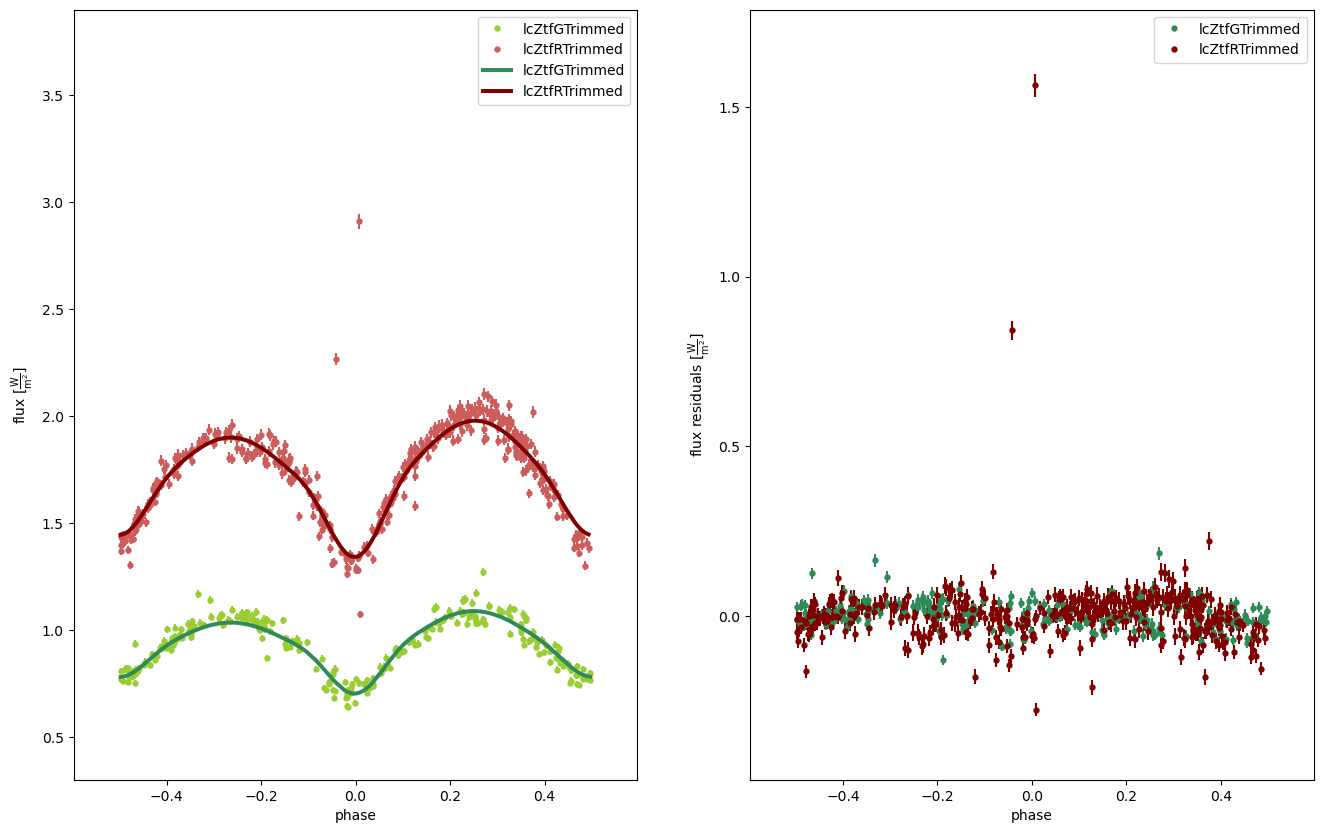

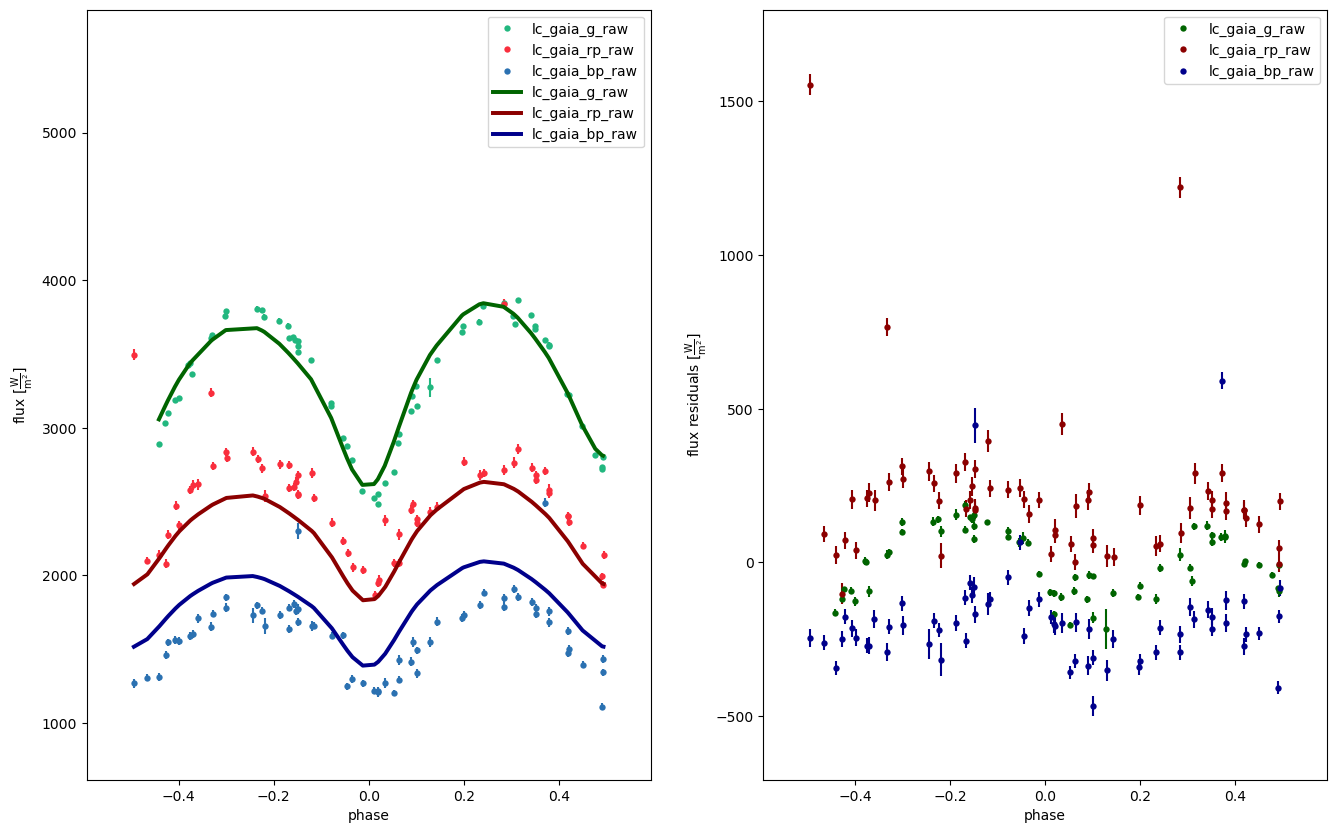

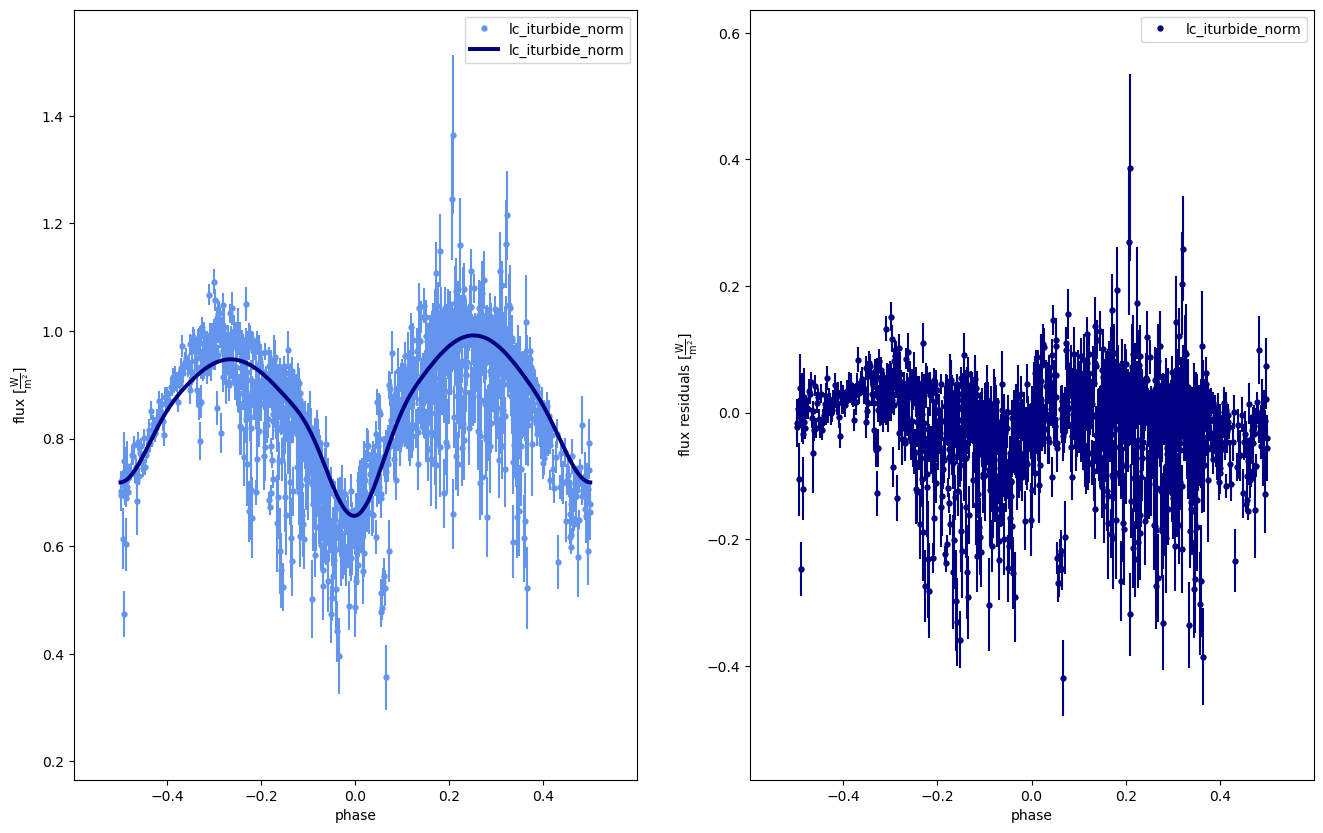

{'lcZtfGTrimmed-lcZtfRTrimmed': <Figure size 1600x1000 with 2 Axes>,
 'lc_gaia_g_raw-lc_gaia_rp_raw-lc_gaia_bp_raw': <Figure size 1600x1000 with 2 Axes>,
 'lc_iturbide_norm': <Figure size 1600x1000 with 2 Axes>}

In [13]:
gen_utils.plotModelResidualsFigsize(b, figsize=(16, 10), datasetGroups=plotGroups_trimmed, model='after_nm')

# Set up DC

In [5]:
gen_utils.abilitateDatasets(b, trimmedZtfDatasets, includeMesh=False)
b.set_value(qualifier='fillout_factor', value=0.11) # original value of 0.035 likely too small, causing problems with DC run
b.add_solver('optimizer.differential_corrections', solver='opt_dc', overwrite=True,
			 	fit_parameters=['q', 'incl@binary', 'fillout_factor', 'teffratio'],
				steps={
					'q': 0.1,
					'incl@binary': 5,
					'fillout_factor': 0.05,
					'teffratio': 0.04
				})

<ParameterSet: 9 parameters | qualifiers: use_server, steps, deriv_method, expose_lnprobabilities, initial_values, compute, continue_from, comments, fit_parameters>

100%|██████████| 656/656 [01:33<00:00,  7.04it/s]


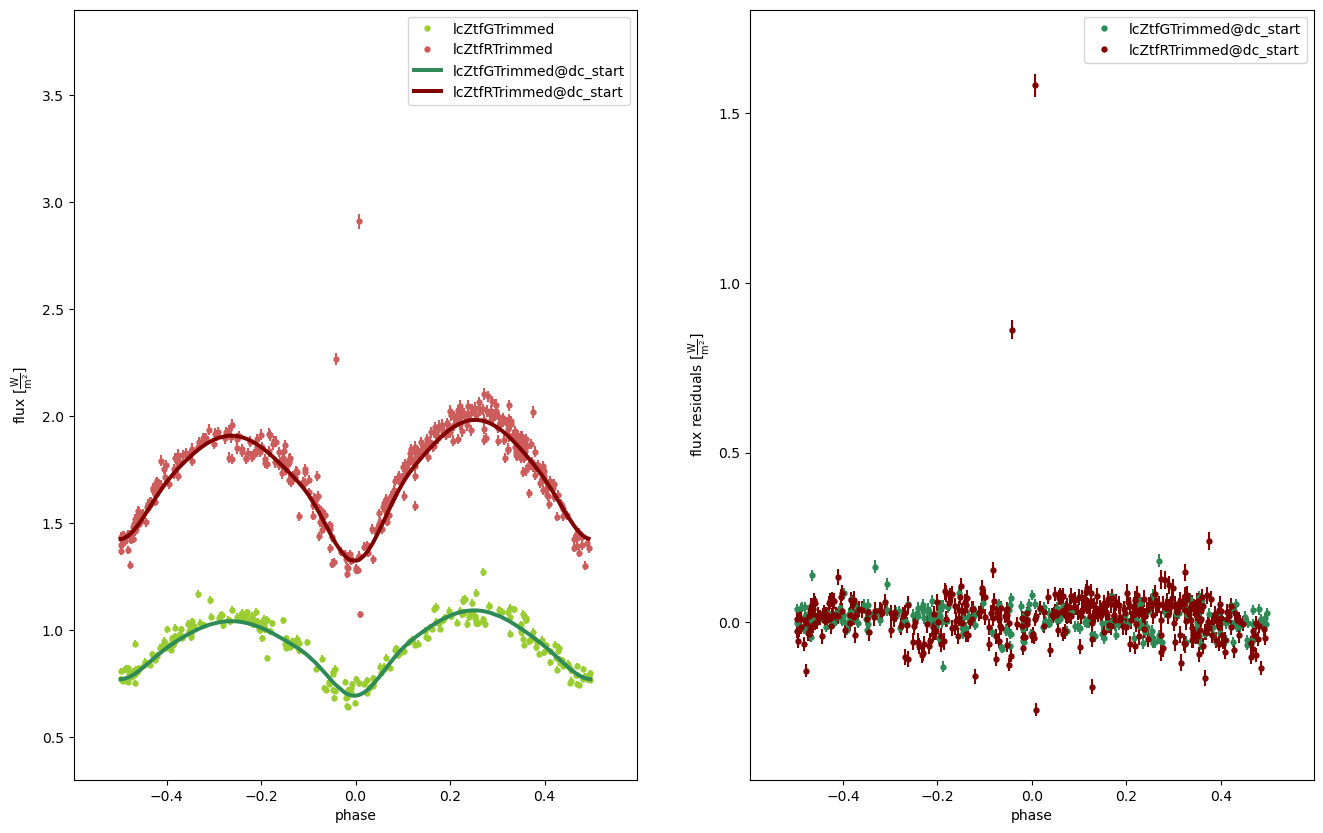

{'lcZtfGTrimmed-lcZtfRTrimmed': <Figure size 1600x1000 with 2 Axes>}

In [6]:
b.run_compute(model='dc_start')
gen_utils.plotModelResidualsFigsize(b, figsize=(16, 10), datasetGroups=[trimmedZtfDatasets], model='dc_start')

In [7]:
gen_utils.printAllModelsChi2(b)

after_nm
	 Gaia (Raw) - 17659.488731195725
		 lc_gaia_g_raw - 5353.675857980934
		 lc_gaia_rp_raw - 6687.63142132585
		 lc_gaia_bp_raw - 5618.1814518889405
------------------------------------------------
	 Iturbide (Full) (Norm) - 6810.787601548287
------------------------------------------------
------------------------------------------------
	 ZTF - 7007.349371226079
		 lcZtfG Not found in model
		 lcZtfR Not found in model
		 lcZtfGTrimmed - 1537.7393346709114
		 lcZtfRTrimmed - 5469.610036555167
dc_start
------------------------------------------------
------------------------------------------------
------------------------------------------------
	 ZTF - 6994.615904143313
		 lcZtfG Not found in model
		 lcZtfR Not found in model
		 lcZtfGTrimmed - 1496.6180628061977
		 lcZtfRTrimmed - 5497.9978413371155


In [21]:
# saving bundle to execute on external compute
gen_utils.saveBundle(b, "dc-run")

Mon, 20 May 2024 14:41 PARAMETERS   WARNING for faster compact saving, install ujson


'bundle-saves/dc-run.json.gz'

# Results

```
q@binary@orbit@component 1.83790  
incl@binary@orbit@component 67.29361 deg 
fillout_factor@contact_envelope@envelope@component 0.08548  
teffratio@binary@orbit@component 0.94769 
```

In [8]:
print(b['q'])
print(b['incl@binary'])
print(b['fillout_factor'])
print(b['teffratio'])

Parameter: q@binary@component
                       Qualifier: q
                     Description: Mass ratio
                           Value: 1.8564781150410863
                  Constrained by: 
                      Constrains: requiv@primary@component, requiv@secondary@component, pot@contact_envelope@component, pot_min@contact_envelope@component, pot_max@contact_envelope@component, sma@binary@component, sma@primary@component, asini@primary@component, requiv_max@primary@component, requiv_min@primary@component, mass@secondary@component, sma@secondary@component, asini@secondary@component, requiv_max@secondary@component, requiv_min@secondary@component
                      Related to: pot@contact_envelope@component, sma@binary@component, requiv@primary@component, requiv@secondary@component, fillout_factor@contact_envelope@component, pot_min@contact_envelope@component, pot_max@contact_envelope@component, mass@primary@component, period@binary@component, sma@primary@component, incl@bina